In [ ]:
## Naive Bayes classifier for Tweet classification

In [1]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import unicodedata as ud
from sklearn.metrics import precision_recall_fscore_support as prfs
import csv
import HTMLParser
from sklearn.metrics import classification_report
from sklearn.cross_validation import cross_val_score
from numpy import random
from nltk.stem.porter import PorterStemmer as porterStemmer
from itertools import izip
import collections
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [2]:
def cleanTweet(originalTweet):
    htmlParser = HTMLParser.HTMLParser()

    tweet = originalTweet
    #tweet = htmlParser.unescape(originalTweet);
    #tweet = tweet.decode('windows-1252').encode('ascii', 'ignore')
    #tweet = tweet.decode('windows-1252')
    #tweet = tweet.decode("utf8").encode('ascii', 'ignore')
    #tweet = re.sub(r'[^\x00-\xFF]+', r'', tweet)
    #tweet = re.sub(r'[^\x00-\x7F]+', r'', tweet)
    #tweet = tweet.decode('utf-8').strip()
    #tweet = tweet.decode('unicode_escape').encode('ascii','ignore')
    #tweet = tweet.encode('ascii','ignore')
    tweet = ''.join([i if ord(i) < 128 else ' ' for i in tweet])
    
    # remove URLs in tweet
    tweet = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', tweet)

    # remove strings starting with @ in tweet
    tweet = re.sub(r'(\s)@\w+', r'', tweet)
    tweet = re.sub(r'@\w+', r'', tweet)
    
    # remove HTML tags from tweet
    tweet = re.sub('<[^<]+?>', '', tweet)

    # separates words joined with capital words.
    # E.g. DisplayIsAweson to Display Is Awesom
    #tweet = " ".join(re.findall('[A-Z][^A-Z]*', tweet));

    # remove exclamations
    tweet = re.sub(r'[<>!#@$:.,%\?-]+', r'', tweet)

    # remove extra white spaces
    tweet = re.sub(r'\s+', r' ', tweet)
    
    # stemming
    stemmer = porterStemmer()
    stemmedTweet = [stemmer.stem(word) for word in tweet.split(" ")]
    stemmedTweet = " ".join(stemmedTweet)
    
    tweet = str(stemmedTweet)
    tweet = tweet.replace("'", "")
    
    return tweet

In [3]:
trainData = pd.read_csv("A:\\new_Sync\\Box Sync\\academics\\sem3\\491\\assignments\\hw4\\data\\train2Columns.csv")

In [4]:
testData = pd.read_csv("A:\\new_Sync\\Box Sync\\academics\\sem3\\491\\assignments\\hw4\\data\\test2Columns.csv")

In [5]:
trainData.shape
#data.head(2)

(80000, 2)

In [6]:
rawTweetsSeries = trainData['tweets'];
tweetLabels = trainData['class'];

In [7]:
rawTestTweetsSeries = testData['tweets'];
testTweetLabels = testData['class'];

In [8]:
rawTestTweetsList = rawTestTweetsSeries.tolist()
testTweetLabelList = testTweetLabels.tolist()

In [9]:
rawTweetsList = rawTweetsSeries.tolist()
tweetLabelList = tweetLabels.tolist()

In [10]:
print (len(rawTweetsList))
print (rawTweetsList[0])
print (len(rawTestTweetsList))
print (rawTestTweetsList[0])

80000
@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
359
@stellargirl I loooooooovvvvvveee my Kindle2. Not that the DX is cool, but the 2 is fantastic in its own right.


In [11]:
randomTweets = random.choice(rawTweetsList, 3)
print (randomTweets)
randomTestTweets = random.choice(rawTestTweetsList, 3)
print (randomTestTweets)

[ "@khouryrt I'll stick with facebook in gravity, hopefully @janole will add more features to it soon "
 "So... I'm running on very few hours of sleep  all I want to do is sleep for the   rest of the day, but I have stuff to do &gt;.&lt;"
 "@summersunrays that's sad "]
[ "The Times of India: The wonder that is India's election. http://bit.ly/p7u1H"
 "@crlane I have the Kindle2. I've seen pictures of the DX, but haven't seen it in person. I love my Kindle - I'm on it everyday."
 'Played with an android google phone. The slide out screen scares me I would break that fucker so fast. Still prefer my iPhone.']


In [12]:
i = 0;
cleanedTweetsList = []
for tweet in rawTweetsList:
    #tweet.encode('utf-8').strip()
    #tweet = tweet.decode("utf8").encode('ascii', 'ignore')
    #print (i ,),
    cleanedTweet = cleanTweet(tweet).encode('ascii', 'ignore').strip();
    cleanedTweetsList.append(cleanedTweet);
    i += 1

In [13]:
j = 0;
cleanedTestTweetsList = []
for tweet in rawTestTweetsList:
    cleanedTestTweet = cleanTweet(tweet).encode('ascii', 'ignore').strip();
    cleanedTestTweetsList.append(cleanedTestTweet);
    j += 1

In [14]:
randomTweets = random.choice(cleanedTweetsList, 3)
print (randomTweets)
randomTestTweets = random.choice(cleanedTestTweetsList, 3)
print (randomTestTweets)

['hahahhahahha I love your joke xD'
 'hehesomeon just sent me an auto DMit began by 1st apolog for send and auto DM'
 'Now I have no Sky until Monday']
['[MLUC09] Custom Innov Award Winner Booz Allen Hamilton'
 'Shit hit the fan in Irancrazi inde iranelect'
 'yay glad you got the phone Still damn you AT&amp;T']


In [15]:
# Create feature vectors
vectorizer = TfidfVectorizer(min_df=0.000125,
                             max_df = 0.75,
                             sublinear_tf=True,
                             use_idf=True)

In [16]:
nbClassifier = BernoulliNB()

In [17]:
trainVectors = vectorizer.fit_transform(cleanedTweetsList)
trainVectors.shape

(80000, 4661)

In [18]:
testVectors = vectorizer.transform(cleanedTestTweetsList)
testVectors.shape

(359, 4661)

In [19]:
nbClassifier.fit(trainVectors, tweetLabelList)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [20]:
predictedLabels = nbClassifier.predict(testVectors)

In [21]:
predictedLabelList = predictedLabels.tolist()

In [22]:
classActual = np.array(testTweetLabels)
classPredicted = np.array(predictedLabelList)

In [23]:
#prfs(classActual, classPredicted)

In [24]:
target_names = ['0', '1']

In [25]:
print(classification_report(testTweetLabels, predictedLabelList, target_names=target_names))

             precision    recall  f1-score   support

          0       0.81      0.77      0.79       177
          1       0.79      0.82      0.81       182

avg / total       0.80      0.80      0.80       359



In [26]:
print("Confusion matrix")
print (confusion_matrix(testTweetLabels, predictedLabels))

Confusion matrix
[[137  40]
 [ 32 150]]


In [27]:
counter=collections.Counter(testTweetLabels)
print("Actual values: "),
print (counter)

Actual values:  Counter({1: 182, 0: 177})


In [28]:
counter=collections.Counter(predictedLabels)
print("Actual values: "),
print(counter)

Actual values:  Counter({1: 190, 0: 169})


In [29]:
testAccuracy = nbClassifier.score(testVectors, testTweetLabels)
print ("Test accuracy:"),
print (testAccuracy)

Test accuracy: 0.799442896936


In [30]:
trainAccuracy = nbClassifier.score(trainVectors, tweetLabels)
print ("Train accuracy:"),
print (trainAccuracy)

Train accuracy: 0.7803875


In [31]:
cvScores = cross_val_score(nbClassifier, trainVectors, tweetLabelList, cv=10)
print ("Cross validation scores:"),
print (cvScores)
print ("Mean: ", cvScores.mean())
print ("Minimum: ", cvScores.min())
print ("Maximum: ", cvScores.max())

Cross validation scores: [ 0.7545    0.76475   0.7545    0.75975   0.759125  0.74675   0.76325
  0.77375   0.764875  0.75375 ]
('Mean: ', 0.75950000000000006)
('Minimum: ', 0.74675000000000002)
('Maximum: ', 0.77375000000000005)


In [32]:
xAxis = [x for x in range(1,13)]
yAxis = cvScores.tolist()
yAxis.extend([trainAccuracy, testAccuracy])

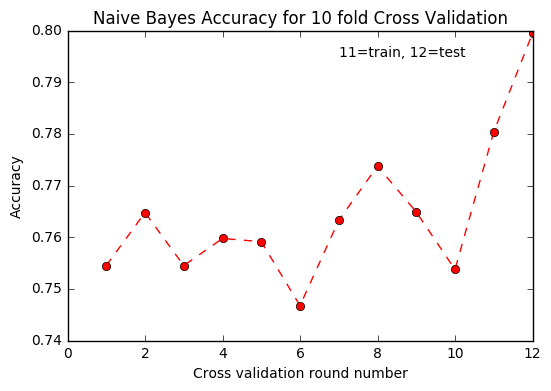

In [33]:
plt.plot(xAxis, yAxis, marker='o', linestyle='--', color='r')
plt.xlabel("Cross validation round number")
plt.ylabel("Accuracy")
plt.title("Naive Bayes Accuracy for 10 fold Cross Validation")
plt.text(7, .795, "11=train, 12=test")
plt.show()

In [34]:
# Question 10

In [35]:
predictionProbabilities = nbClassifier.predict_proba(testVectors)
zeroProbs = predictionProbabilities[:, 1]
oneProbs = predictionProbabilities[:, 0]
topFiveOne = oneProbs.argsort()[-5:][::-1]

In [36]:
print ("Correctly classified probabilities:")
print ("------------------------------------------------------------------------------")
print ("tweetid \t tweet \t actual label \t predited label \t prediction probability");
print ("------------------------------------------------------------------------------")
for x in topFiveOne:
    print (x),
    print (rawTestTweetsList[x]),
    print (testTweetLabelList[x]),
    print (predictedLabelList[x])
    print (predictionProbabilities[x][0])

Correctly classified probabilities:
------------------------------------------------------------------------------
tweetid 	 tweet 	 actual label 	 predited label 	 prediction probability
------------------------------------------------------------------------------
128 THE DENTIST LIED! " U WON'T FEEL ANY DISCOMORT! PROB WON'T EVEN NEED PAIN PILLS" MAN U TWIPPIN THIS SHIT HURT!! HOW MANY PILLS CAN I TAKE!! 0 0
0.999963856742
127 My wrist still hurts. I have to get it looked at. I HATE the dr/dentist/scary places. :( Time to watch Eagle eye. If you want to join, txt! 1 0
0.999721741998
148 Time Warner cable phone reps r dumber than nails!!!!! UGH! Cable was working 10 mins ago now its not WTF! 0 0
0.999622054183
164 @springsingfiend @dvyers @sethdaggett @jlshack AT&amp;T dropped the ball and isn't supporting crap with the new iPhone 3.0... FAIL #att SUCKS!!! 0 0
0.999590439774
124 is being fucked by time warner cable. didnt know modems could explode. and Susan Boyle sucks too! 0 0
0.99

In [37]:
# Question 7

In [38]:
featureNames = vectorizer.get_feature_names()
coefficientArray = nbClassifier.coef_[0]
top20Features = coefficientArray.argsort()[-20:][::-1]

In [39]:
print ("Top 20 features:")
for x in top20Features:
    print (featureNames[x]),

Top 20 features:
the to you it and my for is in of on that im me have with so good just be


In [40]:
# Question 7

In [41]:
#fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)
fpr, tpr, thresholds = metrics.roc_curve(testTweetLabelList, predictedLabelList)
roc_auc = auc(fpr, tpr)

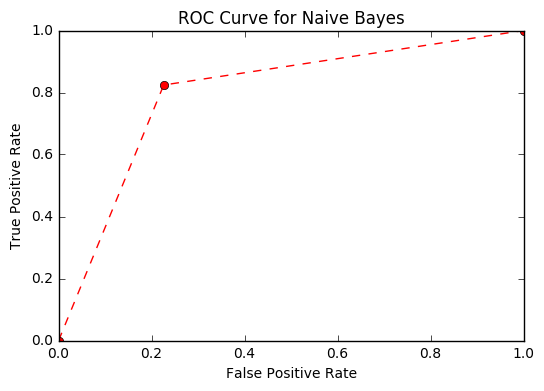

In [43]:
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, marker='o', linestyle='--', color='r')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Naive Bayes")
plt.show()